<a href="https://colab.research.google.com/github/jasanhon/AG1/blob/master/7_AG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import io

Carga del fichero donde esta el dataset

In [0]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"


In [0]:
s=requests.get(url).content 


In [0]:
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [0]:
titanic.rename(columns={'class': 'clase'}, inplace=True)

In [0]:
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch      fare embarked   clase  \
0           0       3    male  22.0      1      0    7.2500        S   Third   
1           1       1  female  38.0      1      0   71.2833        C   First   
2           1       3  female  26.0      0      0    7.9250        S   Third   
3           1       1  female  35.0      1      0   53.1000        S   First   
4           0       3    male  35.0      0      0    8.0500        S   Third   
5           0       3    male   NaN      0      0    8.4583        Q   Third   
6           0       1    male  54.0      0      0   51.8625        S   First   
7           0       3    male   2.0      3      1   21.0750        S   Third   
8           1       3  female  27.0      0      2   11.1333        S   Third   
9           1       2  female  14.0      1      0   30.0708        C  Second   
10          1       3  female   4.0      1      1   16.7000        S   Third   
11      

In [0]:
titanic.rename(columns={'fare': 'tarifa'}, inplace=True)

In [0]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
tarifa         891 non-null float64
embarked       889 non-null object
clase          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [0]:
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

In [0]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [0]:
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3


In [0]:
def is_old_func(row):
  return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

In [0]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,class_num,is_old
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3,False


In [0]:
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,class_num,is_old,is_baby
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,3,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,3,False,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,3,False,False


In [0]:
#Consulta con condiciones
titanic[
(titanic.sex == 'female')
& (titanic['clase'].isin(['First',
'Third']))
& (titanic.age > 35 )
& (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,class_num,is_old,is_baby
40,0,3,female,40.0,1,0,9.4750,S,Third,woman,False,NaN,Southampton,no,False,3,False,False
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,3,False,False
167,0,3,female,45.0,1,4,27.9000,S,Third,woman,False,NaN,Southampton,no,False,3,False,False
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,1,False,False
254,0,3,female,41.0,0,2,20.2125,S,Third,woman,False,NaN,Southampton,no,False,3,False,False
276,0,3,female,45.0,0,0,7.7500,S,Third,woman,False,NaN,Southampton,no,True,3,False,False
362,0,3,female,45.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False,3,False,False
503,0,3,female,37.0,0,0,9.5875,S,Third,woman,False,NaN,Southampton,no,True,3,False,False
610,0,3,female,39.0,1,5,31.2750,S,Third,woman,False,NaN,Southampton,no,False,3,False,False
638,0,3,female,41.0,0,5,39.6875,S,Third,woman,False,NaN,Southampton,no,False,3,False,False


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


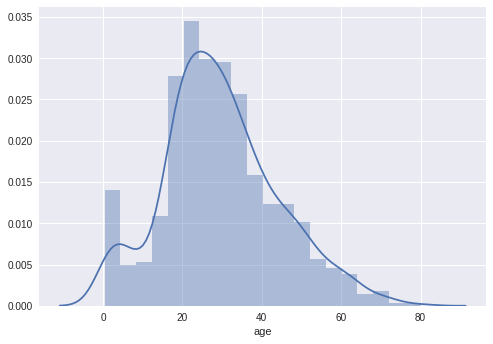

In [0]:
#Distribución de la edad(ege)
sns.distplot (titanic.age.dropna( ))
sns.plt.show ( )

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


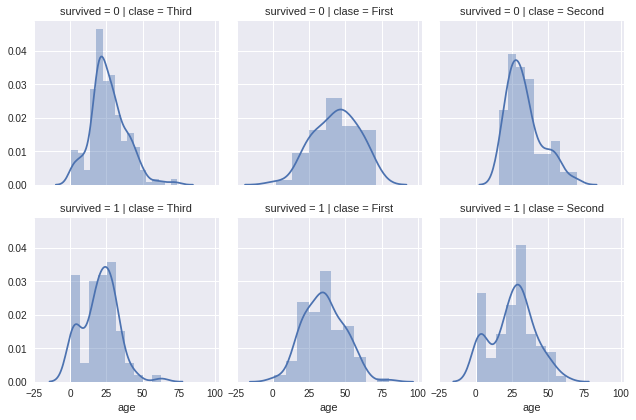

In [0]:
#Cambiamos el font
sns.set(font_scale=1)
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age")
sns.plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


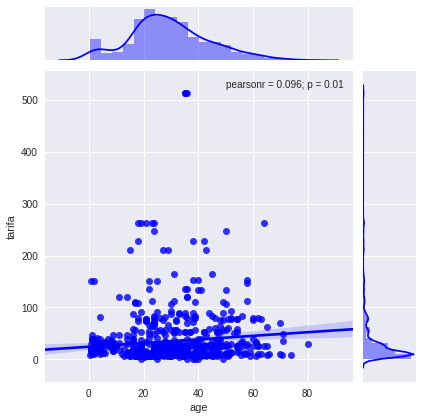

In [0]:
#Diagrama de dispersion con Distribucion de cada variable: fare(precio)/age(edad)

sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='b')
sns.plt.show()

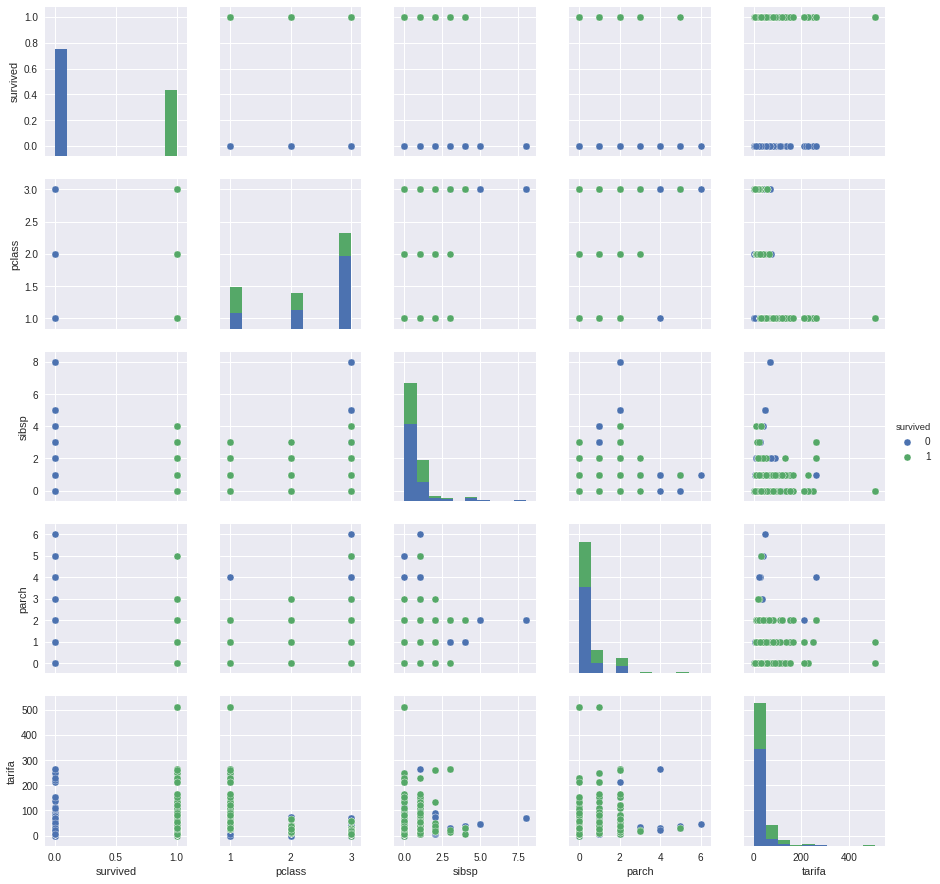

In [0]:
#Define un subconjuto de datos con las variables numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]

#Hace una matriz de diagramas de dispersión de parejas de variables.
sns.pairplot(titanic_num, hue="survived")
sns.plt.show()

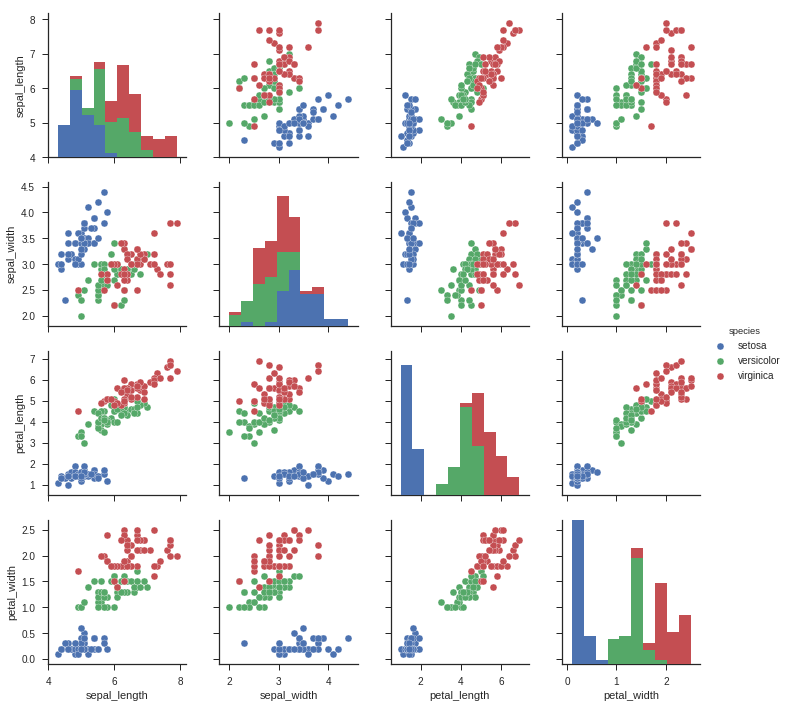

In [0]:
sns.set(style="ticks")
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")